<a href="https://colab.research.google.com/github/kk20krishna/Intelligent-Sourcing/blob/main/Supply_Chain_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supply Chain Optimization**

Created by Krishna Kumar Sankaran Kutty

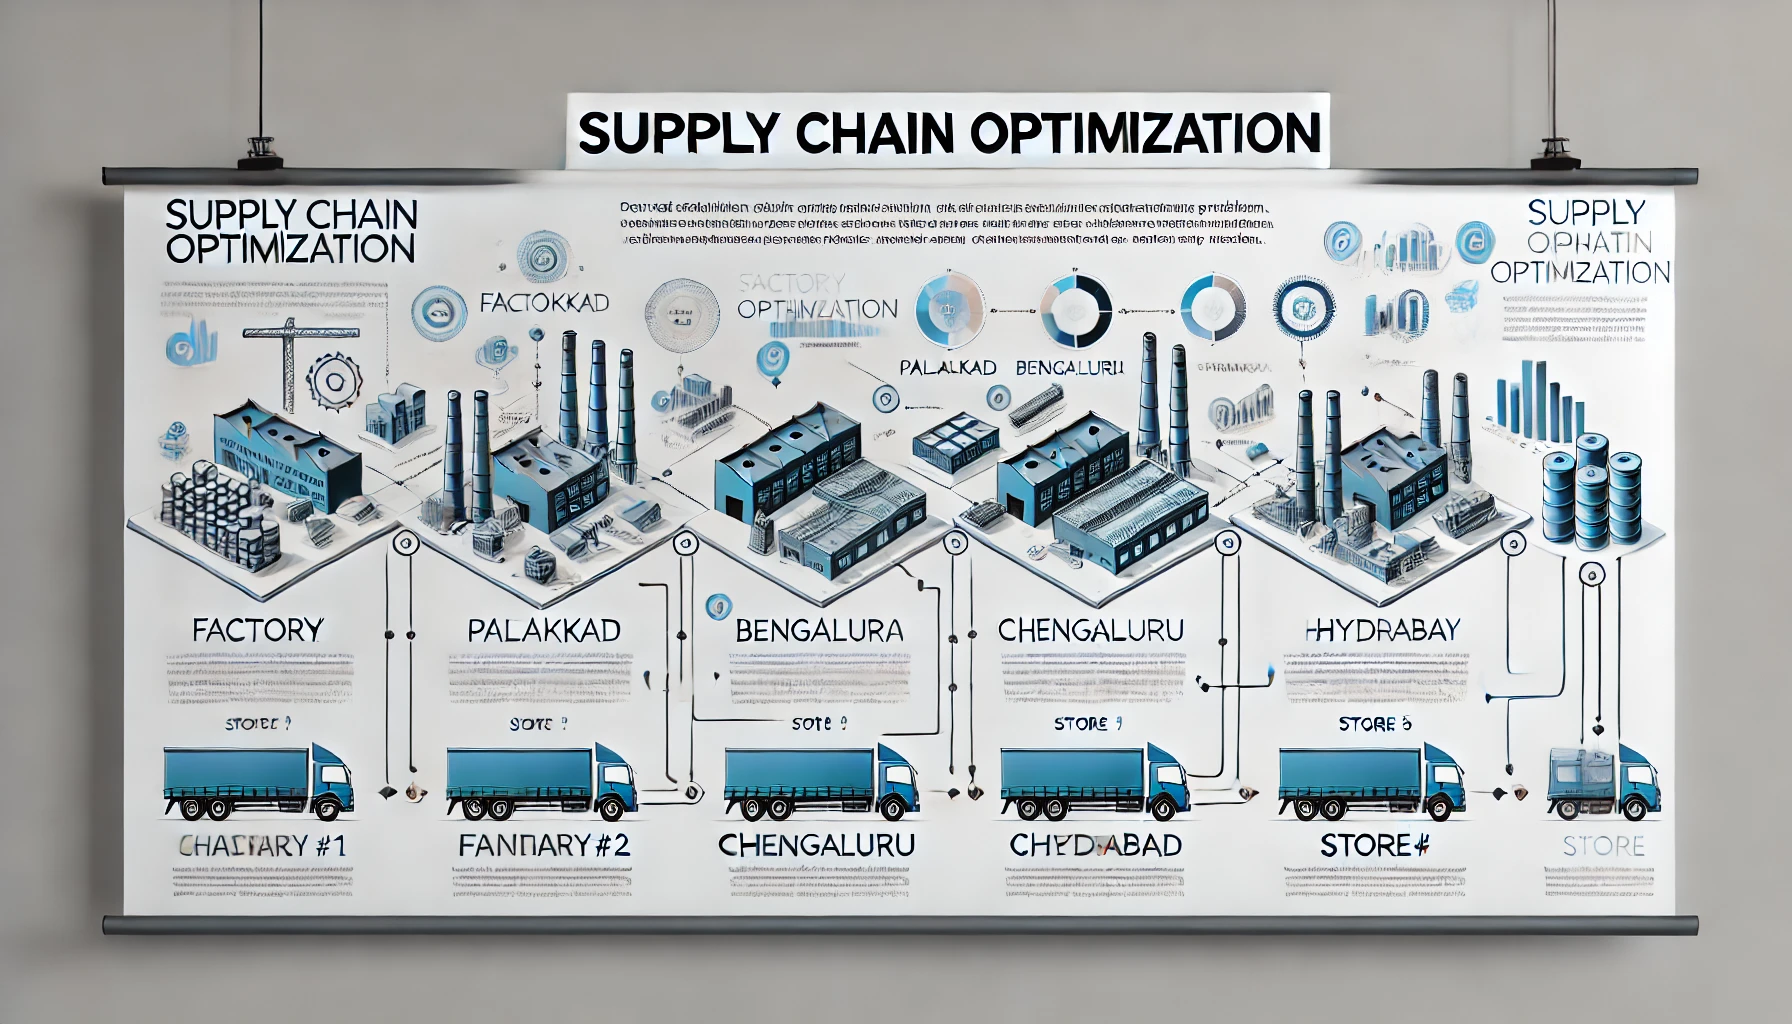

# Problem Statement

A company has multiple factories, multiple warehouses and stores located across different regions. The goal is to determine the optimal distribution plan to minimize the total transportation cost while meeting the demand of each store and respecting the production of each factory.

| Feature | Description |
|---|---|
| **Company Name** |  *Test Company* |
| **Number of Factories** | 2 |
| **Factory Names** | Factory#1, Factory#2 |
| **Number of Warehouses** | 4 |
| **Warehouse Names** | Palakkad, Bengaluru, Chennai, Hyderabad |
| **Number of Stores** | 5 |
| **Store Names** | Store#1, Store#2, Store#3, Store#4, Store#5 |


# Approach

We will use Linear Programming to model and solve this optimization problem. This involves defining decision variables, formulating an objective function, and specifying constraints. The PuLP library in Python will be used to implement and solve the model.

## Cost Function

The objective function is to minimize the total transportation cost. This is calculated as the sum of the products of the quantity transported on each route and the corresponding transportation cost.

**Mathematically:**

Minimize:

$ Sum(vars[f][w] * costs[f][w] for (f, w) in Routes) + Sum(vars[w][s] * costs[w][s] for (w, s) in Routes) $


where:
-   `vars[f][w]` represents the quantity transported from factory `f` to warehouse `w`.
-   `costs[f][w]` represents the cost of transporting one unit from factory `f` to warehouse `w`.
-   `vars[w][s]` represents the quantity transported from warehouse `w` to store `s`.
-   `costs[w][s]` represents the cost of transporting one unit from warehouse `w` to store `s`.
-   `Routes` represents all possible transportation routes.

## Constraints

The optimization problem is subject to the following constraints:

1.  **Supply Constraint:** The total quantity shipped from each factory cannot exceed its production capacity.
2.  **Routing Conttraint:** The total quantity shipped from each warehouse should be equalt to the supply it received from all the factories.
3.  **Demand Constraint:** The total quantity received by each store must meet its demand.
4.  **Non-negativity Constraint:** The quantity transported on each route must be non-negative.

**Mathematically:**

1.  Supply Constraint: `lpSum([vars[w][s] for s in Stores]) <= supply[w]` for each warehouse `w`
2.  Demand Constraint: `lpSum([vars[w][s] for s in Warehouses]) == demand[s]` for each store `s`
3.  Non-negativity Constraint: `vars[w][s] >= 0` for all routes `(w, s)`

# Final Outcomes

The optimization model provides the following outputs:

1.  **Optimal Distribution Plan:** The quantity of goods to be transported from each factory to each warehouse to each store.
2.  **Minimum Transportation Cost:** The total cost associated with the optimal distribution plan.

**Analyzing Results:**
- Review the `Detailed Distribution Report` to observe the specific quantities shipped on each route.
- Examine the `Total Cost of Transportation` to assess the efficiency of the optimized plan.

By implementing this approach, the company can effectively manage its distribution network, minimize transportation costs, and ensure that customer demand is satisfied.

# Housekeeping

In [ ]:
#!pip install pulp

In [ ]:
# Import PuLP modeler functions
from pulp import *

# Input Data

## Factory Data

In [ ]:
# Creates a list of all the supply nodes
Factories = ["Factory#1", "Factory#2"]

# Creates a dictionary for the number of units of supply for each supply node
production = {"Factory#1": 1000, "Factory#2": 2000}

## Warehouse Data

In [ ]:
# Creates a list of all the supply nodes
Warehouses = ["Palakkad", "Bengaluru", 'Chennai', 'Hyderabad']

# Creates a dictionary for the number of units of supply for each supply node
#supply = {"Palakkad": 1000, "Bengaluru": 4000, "Chennai": 0, "Hyderabad": 0}

In [ ]:
#for w in Warehouses:
#  print(f'Warehouse {w} has {supply[w]} units of supply')

## Demand Data

In [ ]:
# Creates a list of all demand nodes
Stores = ["Store#1", "Store#2", "Store#3", "Store#4", "Store#5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "Store#1": 200,
    "Store#2": 400,
    "Store#3": 200,
    "Store#4": 400,
    "Store#5": 200,
}

In [ ]:
for s in Stores:
  print(f'Store {s} has {demand[s]} units of demand')

Store Store#1 has 200 units of demand
Store Store#2 has 400 units of demand
Store Store#3 has 200 units of demand
Store Store#4 has 400 units of demand
Store Store#5 has 200 units of demand


## Cost Details

### Factory to Warehouse

In [ ]:
# Creates a list of costs of each transportation path from Factory to warehouse
fac_costs = [  # Warehouse
    # 1 2 3 4 5
    [2, 4, 5, 2],  # A   Factory 1
    [3, 1, 3, 2],  # B
    [2, 4, 5, 2],  # C   Factory 2
    [3, 1, 3, 2],  # D
]

# The cost data is made into a dictionary
fac_costs = makeDict([Factories, Warehouses], fac_costs, 0)

In [ ]:
for f in Factories:
  for w in Warehouses:
      print(f'The cost of transporting {f} to {w} is {fac_costs[f][w]}')

The cost of transporting Factory#1 to Palakkad is 2
The cost of transporting Factory#1 to Bengaluru is 4
The cost of transporting Factory#1 to Chennai is 5
The cost of transporting Factory#1 to Hyderabad is 2
The cost of transporting Factory#2 to Palakkad is 3
The cost of transporting Factory#2 to Bengaluru is 1
The cost of transporting Factory#2 to Chennai is 3
The cost of transporting Factory#2 to Hyderabad is 2


### Warehouse to Store

In [ ]:
# Creates a list of costs of each transportation path from warehouse to store
costs = [  # Stores
    # 1 2 3 4 5
    [2, 4, 5, 2, 1],  # A   Warehouses
    [3, 1, 3, 2, 3],  # B
    [2, 4, 5, 2, 1],  # C   Warehouses
    [3, 1, 3, 2, 3],  # D
]

# The cost data is made into a dictionary
costs = makeDict([Warehouses, Stores], costs, 0)

In [ ]:
for w in Warehouses:
  for s in Stores:
    print(f'The cost of transporting {w} to {s} is {costs[w][s]}')

The cost of transporting Palakkad to Store#1 is 2
The cost of transporting Palakkad to Store#2 is 4
The cost of transporting Palakkad to Store#3 is 5
The cost of transporting Palakkad to Store#4 is 2
The cost of transporting Palakkad to Store#5 is 1
The cost of transporting Bengaluru to Store#1 is 3
The cost of transporting Bengaluru to Store#2 is 1
The cost of transporting Bengaluru to Store#3 is 3
The cost of transporting Bengaluru to Store#4 is 2
The cost of transporting Bengaluru to Store#5 is 3
The cost of transporting Chennai to Store#1 is 2
The cost of transporting Chennai to Store#2 is 4
The cost of transporting Chennai to Store#3 is 5
The cost of transporting Chennai to Store#4 is 2
The cost of transporting Chennai to Store#5 is 1
The cost of transporting Hyderabad to Store#1 is 3
The cost of transporting Hyderabad to Store#2 is 1
The cost of transporting Hyderabad to Store#3 is 3
The cost of transporting Hyderabad to Store#4 is 2
The cost of transporting Hyderabad to Store#5 

# Linear Optimization

## Define Variables - Routes

### Factory to Warehouse

In [ ]:
# Creates a list of tuples containing all the possible routes for transport
fac_Routes = [(f, w) for f in Factories for w in Warehouses]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
fac_vars = LpVariable.dicts("Route", (Factories, Warehouses), 0, None, LpInteger)

for f in Factories:
  for w in Warehouses:
      print(f'The variable for transporting {f} to {w} is {fac_vars[f][w]}')

The variable for transporting Factory#1 to Palakkad is Route_Factory#1_Palakkad
The variable for transporting Factory#1 to Bengaluru is Route_Factory#1_Bengaluru
The variable for transporting Factory#1 to Chennai is Route_Factory#1_Chennai
The variable for transporting Factory#1 to Hyderabad is Route_Factory#1_Hyderabad
The variable for transporting Factory#2 to Palakkad is Route_Factory#2_Palakkad
The variable for transporting Factory#2 to Bengaluru is Route_Factory#2_Bengaluru
The variable for transporting Factory#2 to Chennai is Route_Factory#2_Chennai
The variable for transporting Factory#2 to Hyderabad is Route_Factory#2_Hyderabad


### Warehouse to Store

In [ ]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, s) for w in Warehouses for s in Stores]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Warehouses, Stores), 0, None, LpInteger)

for w in Warehouses:
  for s in Stores:
    print(f'The variable for transporting {w} to {s} is {vars[w][s]}')

The variable for transporting Palakkad to Store#1 is Route_Palakkad_Store#1
The variable for transporting Palakkad to Store#2 is Route_Palakkad_Store#2
The variable for transporting Palakkad to Store#3 is Route_Palakkad_Store#3
The variable for transporting Palakkad to Store#4 is Route_Palakkad_Store#4
The variable for transporting Palakkad to Store#5 is Route_Palakkad_Store#5
The variable for transporting Bengaluru to Store#1 is Route_Bengaluru_Store#1
The variable for transporting Bengaluru to Store#2 is Route_Bengaluru_Store#2
The variable for transporting Bengaluru to Store#3 is Route_Bengaluru_Store#3
The variable for transporting Bengaluru to Store#4 is Route_Bengaluru_Store#4
The variable for transporting Bengaluru to Store#5 is Route_Bengaluru_Store#5
The variable for transporting Chennai to Store#1 is Route_Chennai_Store#1
The variable for transporting Chennai to Store#2 is Route_Chennai_Store#2
The variable for transporting Chennai to Store#3 is Route_Chennai_Store#3
The vari

## Create cost function

In [ ]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Distribution Problem", LpMinimize)

In [ ]:
# The objective function is added to 'prob' first
prob += (
    lpSum([fac_vars[f][w] * fac_costs[f][w] for (f, w) in fac_Routes])
    +
    lpSum([vars[w][s] * costs[w][s] for (w, s) in Routes]),
    "Sum_of_fac_Transporting_Costs",
)

In [ ]:
prob

Distribution_Problem:
MINIMIZE
3*Route_Bengaluru_Store#1 + 1*Route_Bengaluru_Store#2 + 3*Route_Bengaluru_Store#3 + 2*Route_Bengaluru_Store#4 + 3*Route_Bengaluru_Store#5 + 2*Route_Chennai_Store#1 + 4*Route_Chennai_Store#2 + 5*Route_Chennai_Store#3 + 2*Route_Chennai_Store#4 + 1*Route_Chennai_Store#5 + 4*Route_Factory#1_Bengaluru + 5*Route_Factory#1_Chennai + 2*Route_Factory#1_Hyderabad + 2*Route_Factory#1_Palakkad + 1*Route_Factory#2_Bengaluru + 3*Route_Factory#2_Chennai + 2*Route_Factory#2_Hyderabad + 3*Route_Factory#2_Palakkad + 3*Route_Hyderabad_Store#1 + 1*Route_Hyderabad_Store#2 + 3*Route_Hyderabad_Store#3 + 2*Route_Hyderabad_Store#4 + 3*Route_Hyderabad_Store#5 + 2*Route_Palakkad_Store#1 + 4*Route_Palakkad_Store#2 + 5*Route_Palakkad_Store#3 + 2*Route_Palakkad_Store#4 + 1*Route_Palakkad_Store#5 + 0
VARIABLES
0 <= Route_Bengaluru_Store#1 Integer
0 <= Route_Bengaluru_Store#2 Integer
0 <= Route_Bengaluru_Store#3 Integer
0 <= Route_Bengaluru_Store#4 Integer
0 <= Route_Bengaluru_Store#5 I

## Supply Constraints

In [ ]:
# The supply maximum constraints are added to prob for each factory

for f in Factories:
    prob += (
        lpSum([fac_vars[f][w] for w in Warehouses]) <= production[f],
        f"Sum_of_Products_out_of_Factory_{f}",
    )

# Routing Constraints

In [ ]:
# The routing constraints are added to prob for each warehouse

for w in Warehouses:
    prob += (
        lpSum([vars[w][s] for s in Stores]) == lpSum([fac_vars[f][w] for f in Factories]),
        f"Sum_of_Products_out_of_Warehouse_{w}",
    )

## Demand Constraints

In [ ]:
# The demand minimum constraints are added to prob for each demand node (Store)
for s in Stores:
    prob += (
        lpSum([vars[w][s] for w in Warehouses]) == demand[s],
        f"Sum_of_Products_into_Store{s}",
    )

## Print Optimization Problem

In [ ]:
prob

Distribution_Problem:
MINIMIZE
3*Route_Bengaluru_Store#1 + 1*Route_Bengaluru_Store#2 + 3*Route_Bengaluru_Store#3 + 2*Route_Bengaluru_Store#4 + 3*Route_Bengaluru_Store#5 + 2*Route_Chennai_Store#1 + 4*Route_Chennai_Store#2 + 5*Route_Chennai_Store#3 + 2*Route_Chennai_Store#4 + 1*Route_Chennai_Store#5 + 4*Route_Factory#1_Bengaluru + 5*Route_Factory#1_Chennai + 2*Route_Factory#1_Hyderabad + 2*Route_Factory#1_Palakkad + 1*Route_Factory#2_Bengaluru + 3*Route_Factory#2_Chennai + 2*Route_Factory#2_Hyderabad + 3*Route_Factory#2_Palakkad + 3*Route_Hyderabad_Store#1 + 1*Route_Hyderabad_Store#2 + 3*Route_Hyderabad_Store#3 + 2*Route_Hyderabad_Store#4 + 3*Route_Hyderabad_Store#5 + 2*Route_Palakkad_Store#1 + 4*Route_Palakkad_Store#2 + 5*Route_Palakkad_Store#3 + 2*Route_Palakkad_Store#4 + 1*Route_Palakkad_Store#5 + 0
SUBJECT TO
Sum_of_Products_out_of_Factory_Factory#1: Route_Factory#1_Bengaluru
 + Route_Factory#1_Chennai + Route_Factory#1_Hyderabad
 + Route_Factory#1_Palakkad <= 1000

Sum_of_Products_o

## Solve

In [ ]:
# The problem data is written to an .lp file
#prob.writeLP("DistributionProblem.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])


Status: Optimal


## Detailed Report

In [ ]:
#Detailed Report

print("\n Company Setup Report:")
print("=================================")

print('Factory List:')
for f in Factories:
  print(f'Factory {f}')

print('Warehouse List:')
for w in Warehouses:
  print(f'Warehouse {w}')

print('Store List:')
for s in Stores:
  print(f'Store {w}')

print("\n Production and Demand Report:")
print("=================================")

for f in Factories:
  print(f'Factory {f} has {production[f]} units of production')

for s in Stores:
  print(f'Store {s} has {demand[s]} units of demand')

print("\n Distribution Report:")
print("========================")

#Supply from each Factory to each Warehouse
print("\nSupply from each Factory to each Warehouse:")
for f in Factories:
    for w in Warehouses:
      route_var = f"Route_{f}_{w}"
      for v in prob.variables():
        if v.name == route_var and v.varValue != 0:
          print(f"Factory {f} supplies {v.varValue} units to Warehouse {w}")
          break

print("\nTotal supply from each Factory:")
for f in Factories:
    total_supply = sum([v.varValue for v in prob.variables() if v.name.startswith(f"Route_{f}_")])
    print(f"Factory {f}: {total_supply} units")

#Supply from each warehouse to each Store
print("\nSupply from each Warehouse to each Store:")
for w in Warehouses:
    for s in Stores:
        route_var = f"Route_{w}_{s}"
        for v in prob.variables():
            if v.name == route_var and v.varValue != 0:
                print(f"Warehouse {w} supplies {v.varValue} units to Store {s}")
                break

print("\nSupply to each Store and unfulfilled demand:")
for s in Stores:
    total_supplied_to_s = sum([v.varValue for v in prob.variables() if v.name.endswith(f"_{s}")])
    unfulfilled_demand = demand[s] - total_supplied_to_s
    print(f"Stores {s}: Supplied {total_supplied_to_s}, Unfulfilled Demand {unfulfilled_demand}")

print("\nTotal Cost of Transportation = ", value(prob.objective))


 Compamy Setup Report:
Factory List:
Factory Factory#1
Factory Factory#2
Warehouse List:
Warehouse Palakkad
Warehouse Bengaluru
Warehouse Chennai
Warehouse Hyderabad
Store List:
Store Hyderabad
Store Hyderabad
Store Hyderabad
Store Hyderabad
Store Hyderabad

 Production and Demand Report:
Factory Factory#1 has 1000 units of production
Factory Factory#2 has 2000 units of production
Store Store#1 has 200 units of demand
Store Store#2 has 400 units of demand
Store Store#3 has 200 units of demand
Store Store#4 has 400 units of demand
Store Store#5 has 200 units of demand

 Distribution Report:

Supply from each Factory to each Warehouse:
Factory Factory#1 supplies 400.0 units to Warehouse Palakkad
Factory Factory#2 supplies 1000.0 units to Warehouse Bengaluru

Total supply from each Factory:
Factory Factory#1: 400.0 units
Factory Factory#2: 1000.0 units

Supply from each Warehouse to each Store:
Warehouse Palakkad supplies 200.0 units to Store Store#1
Warehouse Palakkad supplies 200.0 uni